In [1]:
import pandas as pd
import pickle
import numpy as np
from google.colab import drive
from datetime import datetime, timedelta
drive.mount('/content/drive')
pickle_path = '/content/drive/MyDrive/trendyol_bootcamp_capstone/'

Mounted at /content/drive


In [2]:
!pip install pyspark

     |████████████████████████████████| 281.4 MB 36 kB/s 
     |████████████████████████████████| 198 kB 61.5 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=245ea6def960e7599a6b80eaed8a9125ba2ab4f147a8e5bf6c3faad35718aa52
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [3]:
!pip install optuna

     |████████████████████████████████| 308 kB 5.2 MB/s 
     |████████████████████████████████| 81 kB 8.5 MB/s 
     |████████████████████████████████| 210 kB 47.6 MB/s 
     |████████████████████████████████| 78 kB 5.3 MB/s 
     |████████████████████████████████| 146 kB 50.7 MB/s 
     |████████████████████████████████| 113 kB 52.8 MB/s 
     |████████████████████████████████| 49 kB 5.5 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=f434600dd379b4171096666e9cff64d5353c0f6743a1a1f5188abbce1022653b
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [4]:
def save_pickle(filename, data):
  outfile = open(pickle_path + filename,'wb')
  pickle.dump(data,outfile)
  outfile.close()

In [5]:
def load_pickle(filename):
  infile = open(pickle_path+filename,'rb')
  loaded_data = pickle.load(infile)
  infile.close()
  return loaded_data

In [6]:
def text_to_categorical(df,column_name):
  one_hot_encoded_df = pd.get_dummies(df[column_name])
  df =pd.concat([df, one_hot_encoded_df], axis=1)
  df.drop(columns=[column_name], inplace = True)
  return df


In [7]:
from sklearn.preprocessing import StandardScaler
def standardize_column(df, column_name):
  x = customers_df.loc[:, [column_name]].values
  df[column_name] = StandardScaler().fit_transform(x)
  return df

In [8]:
def check_sorted(transactions_df):
  t_dat = transactions_df['t_dat'].values
  t_dat_tmp = t_dat[:]
  t_dat_tmp.sort()
  if (np.array_equal(t_dat_tmp,t_dat)):
      print('Transactions_df is sorted')

In [9]:
from sklearn.decomposition import PCA
def get_principle_components(df,n):
  pca = PCA(n_components=n)
  principal_components = pca.fit_transform(df)
  return principal_components


In [10]:
'''
articles_path =  'https://storage.googleapis.com/gm-datascience-share/capstone/articles.csv.gz'
customers_path = 'https://storage.googleapis.com/gm-datascience-share/capstone/customers.csv.gz'
transactions_path = 'https://storage.googleapis.com/gm-datascience-share/capstone/transactions.csv.gz'

articles_df = pd.read_csv(articles_path)
customers_df = pd.read_csv(customers_path)
transactions_df = pd.read_csv(transactions_path)

save_pickle(pickle_path + 'articles.pickle',articles_df)
save_pickle(pickle_path + 'customers.pickle', customers_df)
save_pickle(pickle_path + 'transactions.pickle', transactions_df)
'''

"\narticles_path =  'https://storage.googleapis.com/gm-datascience-share/capstone/articles.csv.gz'\ncustomers_path = 'https://storage.googleapis.com/gm-datascience-share/capstone/customers.csv.gz'\ntransactions_path = 'https://storage.googleapis.com/gm-datascience-share/capstone/transactions.csv.gz'\n\narticles_df = pd.read_csv(articles_path)\ncustomers_df = pd.read_csv(customers_path)\ntransactions_df = pd.read_csv(transactions_path)\n\nsave_pickle(pickle_path + 'articles.pickle',articles_df)\nsave_pickle(pickle_path + 'customers.pickle', customers_df)\nsave_pickle(pickle_path + 'transactions.pickle', transactions_df)\n"

In [11]:
articles_df = load_pickle('articles.pickle')
customers_df = load_pickle('customers.pickle')
transactions_df = load_pickle('transactions.pickle')

In [12]:
#hiç satın alınmamış ürünler ve satın almamış customerlarla ilgilenmiyoruz
customers_in_transactions = set(list(transactions_df['customer_id']))
customers_df = customers_df[customers_df['customer_id'].isin(customers_in_transactions)]

articles_in_transactions = set(list(transactions_df['article_id']))
articles_df = articles_df[articles_df['article_id'].isin(articles_in_transactions)]


# **TRANSACTIONS**

In [13]:
transactions_df = load_pickle('transactions.pickle')

In [14]:
'''
transactions_df['t_dat'] =  pd.to_datetime(transactions_df['t_dat'], format='%Y-%m-%d')
#train test split
transaction_count = len(transactions_df['t_dat'])
validation_data_start_date = transactions_df['t_dat'][transaction_count-1] - timedelta(days=14)
test_data_start_date = transactions_df['t_dat'][transaction_count-1] - timedelta(days=6)
between_13_7_condition = np.logical_and(transactions_df['t_dat']<test_data_start_date,transactions_df['t_dat']>validation_data_start_date)
validation_data = transactions_df[between_13_7_condition]
test_data = transactions_df[transactions_df['t_dat'] >= test_data_start_date]
train_data_start_date = transactions_df['t_dat'][0] + timedelta(days=365)
train_data_condition = np.logical_and(transactions_df['t_dat']<=validation_data_start_date,transactions_df['t_dat']>train_data_start_date)
train_data = transactions_df[train_data_condition]
save_pickle('test_data.pickle', test_data)
save_pickle('train_data.pickle', train_data)
save_pickle('validation_data.pickle', validation_data)
'''

"\ntransactions_df['t_dat'] =  pd.to_datetime(transactions_df['t_dat'], format='%Y-%m-%d')\n#train test split\ntransaction_count = len(transactions_df['t_dat'])\nvalidation_data_start_date = transactions_df['t_dat'][transaction_count-1] - timedelta(days=14)\ntest_data_start_date = transactions_df['t_dat'][transaction_count-1] - timedelta(days=6)\nbetween_13_7_condition = np.logical_and(transactions_df['t_dat']<test_data_start_date,transactions_df['t_dat']>validation_data_start_date)\nvalidation_data = transactions_df[between_13_7_condition]\ntest_data = transactions_df[transactions_df['t_dat'] >= test_data_start_date]\ntrain_data_start_date = transactions_df['t_dat'][0] + timedelta(days=365)\ntrain_data_condition = np.logical_and(transactions_df['t_dat']<=validation_data_start_date,transactions_df['t_dat']>train_data_start_date)\ntrain_data = transactions_df[train_data_condition]\nsave_pickle('test_data.pickle', test_data)\nsave_pickle('train_data.pickle', train_data)\nsave_pickle('val

In [15]:
del transactions_df

test_data = load_pickle('test_data.pickle')
train_data = load_pickle('train_data.pickle')
validation_data = load_pickle('validation_data.pickle')

test_data.reset_index(drop=True,inplace=True)
validation_data.reset_index(drop=True,inplace=True)
train_data.reset_index(drop=True,inplace=True)

In [16]:
set(validation_data['t_dat'])

{Timestamp('2020-09-09 00:00:00'),
 Timestamp('2020-09-10 00:00:00'),
 Timestamp('2020-09-11 00:00:00'),
 Timestamp('2020-09-12 00:00:00'),
 Timestamp('2020-09-13 00:00:00'),
 Timestamp('2020-09-14 00:00:00'),
 Timestamp('2020-09-15 00:00:00')}

In [17]:
set(test_data['t_dat'])

{Timestamp('2020-09-16 00:00:00'),
 Timestamp('2020-09-17 00:00:00'),
 Timestamp('2020-09-18 00:00:00'),
 Timestamp('2020-09-19 00:00:00'),
 Timestamp('2020-09-20 00:00:00'),
 Timestamp('2020-09-21 00:00:00'),
 Timestamp('2020-09-22 00:00:00')}

In [18]:
summer_season = train_data[train_data['t_dat']>= '2020-03-01'] #mart, nisan,mayıs,haziran,temmuz,ağustos
winter_season = train_data[train_data['t_dat']< '2020-03-01'] #eylül, ekim, kasım, aralık, ocak, şubat

# **Seasonality**

In [19]:
most_purchased_items_winter = winter_season.groupby('article_id').size().sort_values(ascending=False)[:10].to_frame(name='count')
most_purchased_items_winter = most_purchased_items_winter.reset_index()
most_purchased_items_winter.merge(articles_df, on='article_id')

,article_id,count,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,706016001,16551,706016,Jade HW Skinny Denim TRS,272,Trousers,Garment Lower body,1010016,Solid,9,...,Trousers,D,Divided,2,Divided,53,Divided Collection,1009,Trousers,High-waisted jeans in washed superstretch deni...
1,673677002,9323,673677,Henry polo. (1),252,Sweater,Garment Upper body,1010016,Solid,9,...,Knitwear,A,Ladieswear,1,Ladieswear,11,Womens Tailoring,1003,Knitwear,"Jumper in a soft, fine knit with a ribbed polo..."
2,720125001,9222,720125,SUPREME RW tights,273,Leggings/Tights,Garment Lower body,1010016,Solid,9,...,Ladies Sport Bottoms,S,Sport,26,Sport,5,Ladies H&M Sport,1005,Jersey Fancy,Sports tights in fast-drying functional fabric...
3,706016002,9107,706016,Jade HW Skinny Denim TRS,272,Trousers,Garment Lower body,1010016,Solid,71,...,Trousers,D,Divided,2,Divided,53,Divided Collection,1009,Trousers,High-waisted jeans in washed superstretch deni...
4,562245046,8381,562245,Luna skinny RW,272,Trousers,Garment Lower body,1010016,Solid,9,...,Trouser,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1009,Trousers,"5-pocket jeans in washed, superstretch denim w..."
5,158340001,8170,158340,Highwaist 30 den 1p Tights,273,Leggings/Tights,Garment Lower body,1010016,Solid,9,...,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,High-waisted tights that lift the bum and shap...
6,706016003,8090,706016,Jade HW Skinny Denim TRS,272,Trousers,Garment Lower body,1010016,Solid,73,...,Trousers,D,Divided,2,Divided,53,Divided Collection,1009,Trousers,High-waisted jeans in washed superstretch deni...
7,608776002,7720,608776,Scallop 5p Socks,302,Socks,Socks & Tights,1010016,Solid,9,...,Shopbasket Socks,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,Fine-knit socks with a scalloped edge.
8,156231001,7298,156231,Box 4p Tights,304,Underwear Tights,Socks & Tights,1010016,Solid,9,...,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,Matt tights with an elasticated waist. 20 denier.
9,464297007,6954,464297,Greta Thong Mynta Low 3p,286,Underwear bottom,Underwear,1010014,Placement print,9,...,Casual Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear",Thong briefs in cotton jersey with a wide lace...


In [20]:
most_purchased_items_summer = summer_season.groupby('article_id').size().sort_values(ascending=False)[:10].to_frame(name='count')
most_purchased_items_summer = most_purchased_items_summer.reset_index()
most_purchased_items_summer.merge(articles_df, on='article_id')

,article_id,count,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,706016001,13040,706016,Jade HW Skinny Denim TRS,272,Trousers,Garment Lower body,1010016,Solid,9,...,Trousers,D,Divided,2,Divided,53,Divided Collection,1009,Trousers,High-waisted jeans in washed superstretch deni...
1,610776002,11559,610776,Tilly (1),255,T-shirt,Garment Upper body,1010016,Solid,9,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,T-shirt in lightweight jersey with a rounded h...
2,759871002,10398,759871,Tilda tank,253,Vest top,Garment Upper body,1010016,Solid,9,...,EQ Divided Basics,D,Divided,2,Divided,80,Divided Complements Other,1002,Jersey Basic,"Cropped, fitted top in cotton jersey with narr..."
3,610776001,9706,610776,Tilly (1),255,T-shirt,Garment Upper body,1010016,Solid,10,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,T-shirt in lightweight jersey with a rounded h...
4,599580038,9566,599580,Timeless Midrise Brief,59,Swimwear bottom,Swimwear,1010016,Solid,42,...,Swimwear,B,Lingeries/Tights,1,Ladieswear,60,"Womens Swimwear, beachwear",1018,Swimwear,Fully lined bikini bottoms with a mid waist an...
5,599580055,9349,599580,Timeless Midrise Brief,59,Swimwear bottom,Swimwear,1010006,Dot,93,...,Swimwear,B,Lingeries/Tights,1,Ladieswear,60,"Womens Swimwear, beachwear",1018,Swimwear,Fully lined bikini bottoms with a mid waist an...
6,751471001,9308,751471,Pluto RW slacks (1),272,Trousers,Garment Lower body,1010016,Solid,9,...,Trouser,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1009,Trousers,Ankle-length cigarette trousers in a stretch w...
7,372860002,9277,372860,7p Basic Shaftless,302,Socks,Socks & Tights,1010016,Solid,10,...,Shopbasket Socks,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,Fine-knit trainer socks in a soft cotton blend.
8,841383002,8891,841383,Vanessa 2-pack,253,Vest top,Garment Upper body,1010016,Solid,9,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Fitted strappy top in soft organic cotton jersey.
9,372860001,8543,372860,7p Basic Shaftless,302,Socks,Socks & Tights,1010016,Solid,9,...,Shopbasket Socks,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,Fine-knit trainer socks in a soft cotton blend.


# **CUSTOMERS**

In [21]:
customers_df.head()

,customer_id,club_member_status,fashion_news_frequency,age
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,ACTIVE,NONE,49.0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,ACTIVE,NONE,25.0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,ACTIVE,NONE,24.0
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,ACTIVE,NONE,54.0
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,ACTIVE,Regularly,52.0


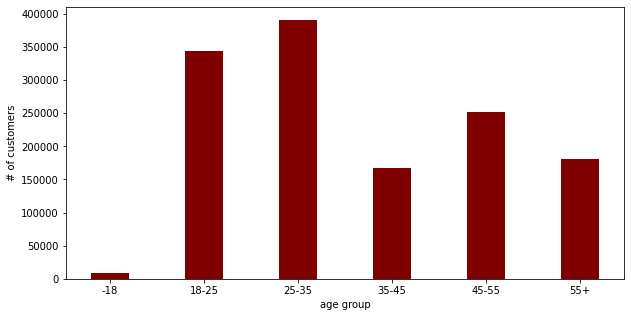

In [31]:
import numpy as np
import matplotlib.pyplot as plt
 
below_18 = list(customers_df['age'] < 18).count(True)
btw_18_25 = list(np.logical_and(customers_df['age'] >= 18, customers_df['age'] < 25)).count(True)
btw_25_35 = list(np.logical_and(customers_df['age'] >= 25, customers_df['age'] < 35)).count(True)
btw_35_45 = list(np.logical_and(customers_df['age'] >= 35, customers_df['age'] < 45)).count(True)
btw_45_55 = list(np.logical_and(customers_df['age'] >= 45, customers_df['age'] < 55)).count(True)
above_55 = list(customers_df['age'] >= 55).count(True)

fig = plt.figure(figsize = (10, 5))
values = [below_18, btw_18_25, btw_25_35, btw_35_45, btw_45_55, above_55]
names = ['-18','18-25','25-35','35-45','45-55','55+']
# creating the bar plot
plt.bar(names, values, color ='maroon',
        width = 0.4)

plt.xlabel("age group")
plt.ylabel("# of customers")
plt.show()

In [32]:
#adding a new feature to customers 
purchase_counts = train_data.groupby('customer_id').size()
purchase_counts = purchase_counts.to_frame(name='purchase_count')

In [33]:
customers_df['purchase_count'] = 0
customers_df.set_index('customer_id', inplace = True)
customers_df.update(purchase_counts)

In [34]:
#adding a new feature to customers
most_used_sales_channel_ids = train_data.groupby(['customer_id'])['sales_channel_id'].max().to_frame('sales_channel_id')
customers_df['sales_channel_id'] = 0
customers_df.update(most_used_sales_channel_ids)

In [35]:
customers_df.head()

,club_member_status,fashion_news_frequency,age,purchase_count,sales_channel_id
customer_id,,,,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,ACTIVE,NONE,49.0,12.0,2.0
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,ACTIVE,NONE,25.0,35.0,2.0
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,ACTIVE,NONE,24.0,13.0,2.0
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e,ACTIVE,NONE,54.0,0.0,0.0
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,ACTIVE,Regularly,52.0,9.0,2.0


In [36]:
for column_name in customers_df.keys():
  nan_count = len(customers_df[customers_df[[column_name]].isna().any(axis=1)])
  if nan_count > 0:
    print(str(nan_count) + " Nan found in column name " + column_name)

6054 Nan found in column name club_member_status
15999 Nan found in column name fashion_news_frequency
15761 Nan found in column name age


In [37]:
customers_df['age'].fillna(customers_df.age.mean(), inplace=True) #replaces nan values with the mean of age
customers_df['club_member_status'].fillna('NAN_MEMBER_STAT', inplace=True)
customers_df['fashion_news_frequency'].fillna('NAN_NEWS_FREQ', inplace=True) 
print("**Filling nan**")
print("# of nan val columns: " + str(len(customers_df[customers_df.isna().any(axis=1)]))) #number of rows containing nan values

**Filling nan**
# of nan val columns: 0


In [38]:
customers_df.keys()

Index(['club_member_status', 'fashion_news_frequency', 'age', 'purchase_count',
       'sales_channel_id'],
      dtype='object')

In [39]:
#for None-> NONE
customers_df['fashion_news_frequency'] = customers_df['fashion_news_frequency'].str.upper()
customers_df.groupby(['fashion_news_frequency']).size()

#text to categorical
customers_df = text_to_categorical(customers_df, 'fashion_news_frequency')
customers_df = text_to_categorical(customers_df, 'club_member_status')
customers_df = text_to_categorical(customers_df, 'sales_channel_id')
customers_df.keys()

Index([            'age',  'purchase_count',         'MONTHLY',
         'NAN_NEWS_FREQ',            'NONE',       'REGULARLY',
                'ACTIVE',       'LEFT CLUB', 'NAN_MEMBER_STAT',
            'PRE-CREATE',               0.0,               1.0,
                     2.0],
      dtype='object')

In [40]:
#for pca, we need to standardize data 
customers_df = standardize_column(customers_df, 'age')
customers_df = standardize_column(customers_df, 'purchase_count')

In [41]:
customers_df

,age,purchase_count,MONTHLY,NAN_NEWS_FREQ,NONE,REGULARLY,ACTIVE,LEFT CLUB,NAN_MEMBER_STAT,PRE-CREATE,0.0,1.0,2.0
customer_id,,,,,,,,,,,,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,0.886130,0.071619,0,0,1,0,1,0,0,0,0,0,1
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,-0.801200,1.258912,0,0,1,0,1,0,0,0,0,0,1
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,-0.871505,0.123240,0,0,1,0,1,0,0,0,0,0,1
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e,1.237656,-0.547838,0,0,1,0,1,0,0,0,1,0,0
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,1.097046,-0.083245,0,0,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e4747568cac33e8c541831,-0.871505,0.897562,0,0,1,0,1,0,0,0,0,0,1
ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab53481233731b5c4f8b7,-1.082421,2.342961,0,0,1,0,1,0,0,0,0,0,1
ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1778d0116cffd259264,-1.082421,0.174862,0,0,0,1,1,0,0,0,0,0,1


In [42]:
principal_components_customers = get_principle_components(customers_df,2)


'''
#1 saat çalıştı bitmedi, çok uzun computation

from sklearn.manifold import TSNE
import seaborn as sns
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(customers_df[['age', 'MONTHLY', 'NONE', 'REGULARLY', 'ACTIVE',
       'LEFT CLUB', 'PRE-CREATE']][:2000])
'''

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


"\n#1 saat çalıştı bitmedi, çok uzun computation\n\nfrom sklearn.manifold import TSNE\nimport seaborn as sns\ntsne = TSNE(n_components=2, verbose=1, random_state=123)\nz = tsne.fit_transform(customers_df[['age', 'MONTHLY', 'NONE', 'REGULARLY', 'ACTIVE',\n       'LEFT CLUB', 'PRE-CREATE']][:2000])\n"

# **ARTICLES**

In [43]:
#only some descriptions are null, no need to fillna
for column_name in articles_df.keys():
  nan_count = len(articles_df[articles_df[[column_name]].isna().any(axis=1)])
  if nan_count > 0:
    print(str(nan_count) + " Nan found in column name " + column_name)

416 Nan found in column name detail_desc


In [44]:
articles_df.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [45]:
#reducing features
articles_df = articles_df[['article_id','garment_group_name', 'index_group_name']]

In [46]:
articles_df.head()

,article_id,garment_group_name,index_group_name
0,108775015,Jersey Basic,Ladieswear
1,108775044,Jersey Basic,Ladieswear
2,108775051,Jersey Basic,Ladieswear
3,110065001,"Under-, Nightwear",Ladieswear
4,110065002,"Under-, Nightwear",Ladieswear


In [47]:
#text to categorical
articles_df = text_to_categorical(articles_df, 'garment_group_name')
articles_df = text_to_categorical(articles_df, 'index_group_name')
articles_df.keys()


Index(['article_id', 'Accessories', 'Blouses', 'Dressed', 'Dresses Ladies',
       'Dresses/Skirts girls', 'Jersey Basic', 'Jersey Fancy', 'Knitwear',
       'Outdoor', 'Shirts', 'Shoes', 'Shorts', 'Skirts', 'Socks and Tights',
       'Special Offers', 'Swimwear', 'Trousers', 'Trousers Denim',
       'Under-, Nightwear', 'Unknown', 'Woven/Jersey/Knitted mix Baby',
       'Baby/Children', 'Divided', 'Ladieswear', 'Menswear', 'Sport'],
      dtype='object')

In [48]:
principal_components_articles = get_principle_components(articles_df[['Accessories', 'Blouses', 'Dressed', 'Dresses Ladies',
       'Dresses/Skirts girls', 'Jersey Basic', 'Jersey Fancy', 'Knitwear',
       'Outdoor', 'Shirts', 'Shoes', 'Shorts', 'Skirts', 'Socks and Tights',
       'Special Offers', 'Swimwear', 'Trousers', 'Trousers Denim',
       'Under-, Nightwear', 'Unknown', 'Woven/Jersey/Knitted mix Baby',
       'Baby/Children', 'Divided', 'Ladieswear', 'Menswear', 'Sport']],2)

# **K Means**

In [49]:
import matplotlib.pyplot as plt
def scatter_plot(principal_components,label):
  #Getting unique labels
  
  u_labels = np.unique(label)
  
  #plotting the results:
  
  for i in u_labels:
      plt.scatter(principal_components[label == i , 0] , principal_components[label == i , 1] , label = i)
  plt.legend()
  plt.show()

In [50]:
from sklearn.cluster import KMeans
import numpy as np
def get_groups(principal_components,n):
  kmeans = KMeans(n_clusters=n, random_state=0).fit(principal_components)
  kmeans.labels_

  label = kmeans.fit_predict(principal_components)
  one_hot_encoded = pd.get_dummies(label)
  #kmeans.cluster_centers_
  
  return label, one_hot_encoded

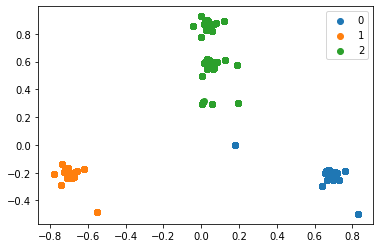

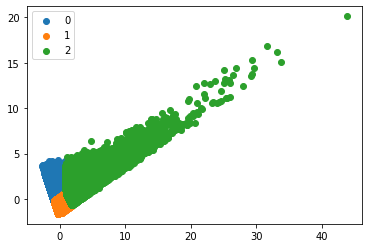

In [54]:
n = 3
articles_labels, one_hot_encoded_articles = get_groups(principal_components_articles, n)
scatter_plot(principal_components_articles,articles_labels)
customers_labels, one_hot_encoded_customers = get_groups(principal_components_customers, n)
scatter_plot(principal_components_customers,customers_labels)

In [61]:
articles_group_0 = articles_df[articles_labels==0]
articles_group_1 = articles_df[articles_labels==1]
articles_group_2 = articles_df[articles_labels==2]
articles_group_2

,article_id,Accessories,Blouses,Dressed,Dresses Ladies,Dresses/Skirts girls,Jersey Basic,Jersey Fancy,Knitwear,Outdoor,...,Trousers,Trousers Denim,"Under-, Nightwear",Unknown,Woven/Jersey/Knitted mix Baby,Baby/Children,Divided,Ladieswear,Menswear,Sport
16,118458003,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
17,118458004,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
18,118458028,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
19,118458029,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
20,118458034,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105512,947060001,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
105515,947253001,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
105530,949551001,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
105531,949551002,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [62]:
#TODO: customer grouping should be added!
article_purchase_df = train_data.groupby('article_id').size().to_frame(name='purchase_count')
article_purchase_df.head()

,purchase_count
article_id,
108775015,103
108775044,418
110065001,155
110065002,65
110065011,101


In [63]:
article_group0_df = article_purchase_df.merge(articles_group_0, on='article_id')
article_group1_df = article_purchase_df.merge(articles_group_1, on='article_id')
article_group2_df = article_purchase_df.merge(articles_group_2, on='article_id')
article_group2_df

,article_id,purchase_count,Accessories,Blouses,Dressed,Dresses Ladies,Dresses/Skirts girls,Jersey Basic,Jersey Fancy,Knitwear,...,Trousers,Trousers Denim,"Under-, Nightwear",Unknown,Woven/Jersey/Knitted mix Baby,Baby/Children,Divided,Ladieswear,Menswear,Sport
0,118458004,2,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,118458028,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,162074062,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,176209023,126,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,176209025,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19554,946387001,12,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
19555,947060001,44,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
19556,949551001,138,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
19557,949551002,46,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


# **Collaborative Filtering**
1. Memory Based - based on a similarity matric (cosine sim, pearson corr etc)
  - Item-Item
  - User-User
2. Model Based
  - Clustering based
  - **Matrix Factorization based -> user and movie embeddings, ALS**
  - Deep Learning

# **ALS (Alternating Least Squares)**

Alternating Least Square (ALS) is a matrix factorization algorithm and it runs itself in a parallel fashion. ALS is implemented in Apache Spark ML and built for a larges-scale collaborative filtering problems. ALS is doing a pretty good job at solving scalability and sparseness of the Ratings data, and it’s simple and scales well to very large datasets.

spark.ml currently supports model-based collaborative filtering, in which users and products are described by a small set of latent factors that can be used to predict missing entries.

ALS is a matrix factorization algorithm that uses **Alternating Least Squares with Weighted-Lambda-Regularization (ALS-WR).** (https://link.springer.com/chapter/10.1007/978-3-540-68880-8_32)


**Cold Start Strategy** -> drop

The main problem with Spark ALS is that it will only recommend top products for a specific user (user-products model) and top users for a specific product (product-users model).
(https://towardsdatascience.com/building-a-recommendation-system-with-spark-ml-and-elasticsearch-abbd0fb59454)

**Parameters:**
- numBlocks is the number of blocks the users and items will be partitioned into in order to parallelize computation (defaults to 10).
- rank is the number of latent factors in the model (defaults to 10).
- maxIter is the maximum number of iterations to run (defaults to 10).
- regParam specifies the regularization parameter in ALS (defaults to 1.0).
implicitPrefs specifies whether to use the explicit feedback ALS variant or one adapted for implicit feedback data (defaults to false which means using explicit feedback).
- alpha is a parameter applicable to the implicit feedback variant of ALS that governs the baseline confidence in preference observations (defaults to 1.0).
nonnegative specifies whether or not to use nonnegative constraints for least squares (defaults to false).

In [64]:
#for seasonality
train_data_reduced = train_data[train_data['t_dat']>= '2020-03-01']

In [65]:
def data_preprocess(data_df):
  data_df['timestamp'] = (data_df['t_dat'] - data_df['t_dat'].iloc[0])/pd.to_timedelta('1Min')
  data_df['timestamp'] = data_df['timestamp'].astype(int)
  data_df.drop(columns = ['t_dat','price','sales_channel_id'], inplace = True)
  data_df['rank'] = 1
  data_df.reset_index(drop=True, inplace = True)

  customer_id_dict = {}
  for i,id in enumerate(list(set(data_df.customer_id))):
    customer_id_dict[id] = i

  mapper = pd.DataFrame.from_dict(customer_id_dict, orient='index')
  mapper = mapper.reset_index(drop=False).rename(columns={'index':'customer_id', 0:'customer_int'})
  data_df = data_df.merge(mapper, on='customer_id')
  data_df['customer_id'] = data_df['customer_int']
  data_df.drop(columns = ['customer_int'],inplace = True)
  return data_df

In [ ]:
train_data = data_preprocess(train_data_reduced)
validation_data = data_preprocess(validation_data)
test_data = data_preprocess(test_data)

In [68]:
train_test_data = pd.concat([train_data,test_data])

In [69]:
train_data.head()

,customer_id,article_id,timestamp,rank
0,73080,751628002,0,1
1,73080,599580055,74880,1
2,73080,599580055,74880,1
3,73080,811835004,74880,1
4,73080,811835004,74880,1


In [70]:
train_data.to_csv(pickle_path + "train_data_reduced.txt", header = False, sep = ",", index = False)
test_data.to_csv(pickle_path + "test_data.txt", header = False, sep = ",", index = False)
validation_data.to_csv(pickle_path + "validation_data.txt", header = False, sep = ",", index = False)
train_test_data.to_csv(pickle_path + "train_test_data.txt", header = False, sep = ",", index = False)

In [71]:
# Licensed to the Apache Software Foundation (ASF) under one or more
# contributor license agreements.  See the NOTICE file distributed with
# this work for additional information regarding copyright ownership.
# The ASF licenses this file to You under the Apache License, Version 2.0
# (the "License"); you may not use this file except in compliance with
# the License.  You may obtain a copy of the License at
#
#    http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
#

from pyspark.sql import SparkSession

# $example on$
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.recommendation import ALS
from pyspark.sql import Row

spark = SparkSession\
    .builder\
    .appName("ALSExample")\
    .getOrCreate()

# $example on$

lines_train = spark.read.text(pickle_path + "train_data_reduced.txt").rdd
parts_train = lines_train.map(lambda row: row.value.split(","))
ratingsRDD_train = parts_train.map(lambda p: Row(user_id=int(p[0]), item_id=int(p[1]),
                                      rating=float(p[3]), timestamp=int(p[2])))
training = spark.createDataFrame(ratingsRDD_train)

lines_test = spark.read.text(pickle_path + "test_data.txt").rdd
parts_test = lines_test.map(lambda row: row.value.split(","))
ratingsRDD_test = parts_test.map(lambda p: Row(user_id=int(p[0]), item_id=int(p[1]),
                                      rating=float(p[3]), timestamp=int(p[2])))
test = spark.createDataFrame(ratingsRDD_train)


# Build the recommendation model using ALS on the training data
# Note we set cold start strategy to 'drop' to ensure we don't get NaN evaluation metrics
als = ALS(maxIter=5, regParam=0.01, userCol="user_id", itemCol="item_id", ratingCol="rating",
          coldStartStrategy="drop", implicitPrefs=True)

model = als.fit(training)

# Evaluate the model by computing the RMSE on the test data
predictions = model.transform(test)
evaluator = RegressionEvaluator(metricName="rmse", labelCol="rating",
                                predictionCol="prediction")
rmse = evaluator.evaluate(predictions)
print("Root-mean-square error = " + str(rmse))

users = test.select(als.getUserCol()).distinct().limit(5)
userSubsetRecs = model.recommendForUserSubset(users, 10)
userSubsetRecs.show()

"""
# Generate top 10 movie recommendations for each user
userRecs = model.recommendForAllUsers(10)
# Generate top 10 user recommendations for each movie
movieRecs = model.recommendForAllItems(10)

# Generate top 10 movie recommendations for a specified set of users
users = ratings.select(als.getUserCol()).distinct().limit(3)
userSubsetRecs = model.recommendForUserSubset(users, 10)
# Generate top 10 user recommendations for a specified set of movies
movies = ratings.select(als.getItemCol()).distinct().limit(3)
movieSubSetRecs = model.recommendForItemSubset(movies, 10)
# $example off$
userRecs.show()
movieRecs.show()
userSubsetRecs.show()
movieSubSetRecs.show()
"""
spark.stop()

Root-mean-square error = 0.9720367605004754


/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


+-------+--------------------+
|user_id|     recommendations|
+-------+--------------------+
| 129421|[{720125001, 0.01...|
|  68995|[{751471001, 0.52...|
| 585876|[{783346001, 0.04...|
| 218216|[{759871002, 1.80...|
| 563277|[{706016001, 5.29...|
+-------+--------------------+



# **EVALUATION**

Hit ratio

# **NOTES**


**Future Work**
- LSTM recommender system: https://medium.com/decathlontechnology/building-a-rnn-recommendation-engine-with-tensorflow-505644aa9ff3

- Customer and Item groups can be used